In [1]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from matplotlib.ticker import FuncFormatter
#from matplotlib.ticker import MaxNLocator
matplotlib.rcParams['figure.dpi'] = 125

### Washington vs. Kansas

Washington — Skagit, Whitman

In [3]:
df_WA = pd.read_excel("Data_KS_WA/WA/WA_Report_Generator.xlsx")
#df_WA = df_WA[df_WA['Commodity Name'] != 'All Other Commodities']
df_WA_Skagit = df_WA[df_WA['County Name'] == 'Skagit']
df_WA_Whitman = df_WA[df_WA['County Name'] == 'Whitman']

df_WA.head()

,Commodity Year,Commodity Name,State Abbrv,County Name,Policies Sold,Policies Earning Prem,Policies Indemnified,Units Earning Prem,Units Indemnified,Quantity,...,Companion/Endorsed Acres,Liabilities ($),Total Prem ($),Subsidy ($),Indemnity ($),EFA Prem Discount ($),Addnl Subsidy ($),State Subsidy ($),Earn Prem Rate,Loss Ratio
0,1989,All Other Commodities,WA,Okanogan,1,1,0,2,0,122,...,0,10417,987,168,0,0,0,0,0.094748,0.000000
1,1989,All Other Commodities,WA,Skagit,2,2,0,2,0,147,...,0,14586,604,136,0,0,0,0,0.041409,0.000000
2,1989,WHEAT,WA,Lincoln,747,747,431,1481,695,200126,...,0,22702070,870493,150821,1709526,0,0,0,0.038344,1.963859
3,1989,WHEAT,WA,Spokane,132,132,31,235,39,19065,...,0,2503169,106985,19320,76808,0,0,0,0.042739,0.717932
4,1989,WHEAT,WA,Whitman,1215,1215,353,2062,470,280461,...,0,40049559,1117467,193273,1378891,0,0,0,0.027902,1.233943


In [4]:
df_WA_Skagit_selected = df_WA_Skagit[['Commodity Year', 'Loss Ratio']]
df_WA_Whitman_truncated = df_WA_Whitman.merge(df_WA_Skagit_selected, on=['Commodity Year']).drop(labels='Loss Ratio_y', axis=1)
df_WA_Whitman_truncated = df_WA_Whitman_truncated.rename(columns={'Loss Ratio_x': 'Loss Ratio'})

print(df_WA_Skagit.shape)
print(df_WA_Whitman_truncated.shape)
df_WA_Whitman_truncated.head()

(26, 21)
(26, 21)


,Commodity Year,Commodity Name,State Abbrv,County Name,Policies Sold,Policies Earning Prem,Policies Indemnified,Units Earning Prem,Units Indemnified,Quantity,...,Companion/Endorsed Acres,Liabilities ($),Total Prem ($),Subsidy ($),Indemnity ($),EFA Prem Discount ($),Addnl Subsidy ($),State Subsidy ($),Earn Prem Rate,Loss Ratio
0,1989,WHEAT,WA,Whitman,1215,1215,353,2062,470,280461,...,0,40049559,1117467,193273,1378891,0,0,0,0.027902,1.233943
1,1995,WHEAT,WA,Whitman,2559,2479,258,4246,378,456749,...,0,43039860,1326253,519252,872202,0,0,0,0.030814,0.657643
2,1996,WHEAT,WA,Whitman,2019,1652,49,3006,68,344713,...,0,37169838,1180771,446507,73371,0,0,0,0.031766,0.062138
3,1997,WHEAT,WA,Whitman,1521,1400,36,2666,36,309647,...,0,39384984,1282439,458738,33294,0,0,0,0.032561,0.025961
4,1998,WHEAT,WA,Whitman,1396,1263,78,2558,147,304432,...,0,37415405,1169009,420724,333149,0,0,0,0.031244,0.284984


In [5]:
Skagit_LR = list(df_WA_Skagit['Loss Ratio'])
Whitman_LR = list(df_WA_Whitman['Loss Ratio'])
Whitman_LR_truncated = list(df_WA_Whitman_truncated['Loss Ratio']) # to keep same size as Skagit, for WA_avg_LR
WA_avg_LR = list(np.average(np.array([Skagit_LR, Whitman_LR_truncated]), axis=0))

print('Skagit:', len(Skagit_LR)) # loss ratio
print(Skagit_LR)

print('Whitman:', len(Whitman_LR)) # loss ratio
print(Whitman_LR)

print('WA:', len(WA_avg_LR))
print(WA_avg_LR)

Skagit: 26
[0.0, 0.0, 0.118555, 0.222476, 0.515913, 1.53755, 2.490043, 0.0, 0.26381, 0.149766, 0.787866, 0.767894, 0.0, 0.542462, 2.080537, 2.196538, 1.033007, 2.498145, 2.935736, 0.859945, 2.528034, 5.827459, 2.190602, 2.821362, 2.076544, 0.0]
Whitman: 31
[1.233943, 0.088986, 0.526554, 1.555545, 0.126128, 1.693317, 0.657643, 0.062138, 0.025961, 0.284984, 0.816234, 0.363594, 0.517444, 0.424758, 0.453011, 0.14495, 0.788827, 0.350659, 0.313869, 1.092137, 3.15679, 0.442402, 0.243944, 0.052243, 0.216395, 1.888145, 2.903816, 0.379717, 0.685765, 0.088343, 0.628454]
WA: 26
[0.6169715, 0.3288215, 0.0903465, 0.12421850000000001, 0.4004485, 1.176892, 1.4268185, 0.258722, 0.34428400000000003, 0.3013885, 0.466408, 0.7783605, 0.1753295, 0.4281655, 1.5863369999999999, 2.6766639999999997, 0.7377045, 1.3710445, 1.4939894999999999, 0.53817, 2.2080895, 4.3656375, 1.2851595, 1.7535635, 1.0824435000000001, 0.314227]


Kansas — Grant, Morton

In [6]:
df_KS = pd.read_excel("Data_KS_WA/KS/KS_Report_Generator.xlsx")
#df_KS = df_KS[df_KS['Commodity Name'] != 'All Other Commodities']
df_KS_Grant = df_KS[df_KS['County Name'] == 'Grant']
df_KS_Morton = df_KS[df_KS['County Name'] == 'Morton']

df_KS.head()

,Commodity Year,Commodity Name,State Abbrv,County Name,Policies Sold,Policies Earning Prem,Policies Indemnified,Units Earning Prem,Units Indemnified,Quantity,...,Companion/Endorsed Acres,Liabilities ($),Total Prem ($),Subsidy ($),Indemnity ($),EFA Prem Discount ($),Addnl Subsidy ($),State Subsidy ($),Earn Prem Rate,Loss Ratio
0,1989,WHEAT,KS,Grant,49,47,28,145,71,10051,...,0,685702,71500,21381,158457,0,0,0,0.104272,2.216181
1,1989,WHEAT,KS,Gray,129,126,76,251,124,20935,...,0,1229482,127161,37941,365098,0,0,0,0.103426,2.871147
2,1989,WHEAT,KS,Haskell,75,71,34,181,73,13570,...,0,969071,80135,23696,131035,0,0,0,0.082692,1.635178
3,1989,WHEAT,KS,Kearny,63,57,28,182,42,15541,...,0,921050,116608,34732,87687,0,0,0,0.126603,0.751980
4,1989,WHEAT,KS,Morton,74,72,57,280,197,20192,...,0,1193355,138764,40781,441029,0,0,0,0.116280,3.178266


In [7]:
Grant_LR = list(df_KS_Grant['Loss Ratio'])
Morton_LR = list(df_KS_Morton['Loss Ratio'])
KS_avg_LR = list(np.average(np.array([Grant_LR, Morton_LR]), axis=0))

print('Grant:', len(Grant_LR)) # loss ratio
print(Grant_LR)

print('Morton:', len(Morton_LR)) # loss ratio
print(Morton_LR)

print('KS:', len(KS_avg_LR))
print(KS_avg_LR)

Grant: 31
[2.216181, 0.8195, 0.02655, 0.160988, 0.156027, 3.751074, 1.767409, 4.311336, 0.10953, 0.193834, 0.0, 0.562748, 0.797164, 2.19443, 1.688927, 1.546669, 0.187529, 3.785357, 0.071094, 1.427966, 1.038, 0.049296, 2.410642, 1.238957, 2.413, 2.023561, 1.524709, 0.112038, 1.133707, 0.130522, 0.21751]
Morton: 31
[3.178266, 0.001131, 0.098902, 0.145243, 1.669449, 3.655929, 4.335037, 6.007095, 0.307944, 0.152911, 0.063682, 0.27355, 0.642943, 3.595545, 1.105589, 1.227428, 0.326681, 1.981035, 0.03953, 2.176164, 1.523669, 0.270633, 2.779944, 1.239923, 2.669092, 1.300229, 1.506515, 0.185236, 0.940257, 0.487913, 0.111321]
KS: 31
[2.6972234999999998, 0.4103155, 0.062726, 0.15311550000000002, 0.9127379999999999, 3.7035015, 3.051223, 5.1592155, 0.208737, 0.17337249999999998, 0.031841, 0.418149, 0.7200535, 2.8949875, 1.397258, 1.3870485000000001, 0.25710500000000003, 2.883196, 0.055312, 1.802065, 1.2808345, 0.1599645, 2.595293, 1.23944, 2.5410459999999997, 1.661895, 1.515612, 0.14863700000000002

t-test

In [8]:
stats.ttest_ind(WA_avg_LR, KS_avg_LR) # rejecting null hypothesis

Ttest_indResult(statistic=-1.0061953846524692, pvalue=0.3187279682930706)

### Washington — Skagit, Whitman

In [9]:
stats.ttest_ind(Skagit_LR, Whitman_LR) # failing to reject null hypothesis (no difference)

Ttest_indResult(statistic=2.0789179471956665, pvalue=0.04230190046540257)

### Kansas — Grant, Morton

In [10]:
stats.ttest_ind(Grant_LR, Morton_LR) # rejecting null hypothesis

Ttest_indResult(statistic=-0.5518573687360557, pvalue=0.5830957847768103)

### t-test experiments

In [11]:
WA_counties = ['Lincoln', 'Okanogan', 'Skagit', 'Spokane', 'Whitman']

for county_1 in WA_counties:
    for county_2 in WA_counties:
        WA_county_1 = list(df_WA[df_WA['County Name'] == county_1]['Loss Ratio'])
        WA_county_2 = list(df_WA[df_WA['County Name'] == county_2]['Loss Ratio'])
        print(county_1 + ':', len(WA_county_1), county_2 + ':', len(WA_county_2), 
              stats.ttest_ind(WA_county_1, WA_county_2))

Lincoln: 31 Lincoln: 31 Ttest_indResult(statistic=0.0, pvalue=1.0)
Lincoln: 31 Okanogan: 30 Ttest_indResult(statistic=0.2956146705710941, pvalue=0.7685622778154193)
Lincoln: 31 Skagit: 26 Ttest_indResult(statistic=-1.1806415632971614, pvalue=0.242825894166097)
Lincoln: 31 Spokane: 31 Ttest_indResult(statistic=0.6124578862240583, pvalue=0.5425491657067616)
Lincoln: 31 Whitman: 31 Ttest_indResult(statistic=0.7309032190319998, pvalue=0.467682998413255)
Okanogan: 30 Lincoln: 31 Ttest_indResult(statistic=-0.2956146705710941, pvalue=0.7685622778154193)
Okanogan: 30 Okanogan: 30 Ttest_indResult(statistic=0.0, pvalue=1.0)
Okanogan: 30 Skagit: 26 Ttest_indResult(statistic=-1.3786244885788634, pvalue=0.1736952625276882)
Okanogan: 30 Spokane: 31 Ttest_indResult(statistic=0.22685728777047626, pvalue=0.8213189119715157)
Okanogan: 30 Whitman: 31 Ttest_indResult(statistic=0.3257056467804712, pvalue=0.7457994279522955)
Skagit: 26 Lincoln: 31 Ttest_indResult(statistic=1.1806415632971614, pvalue=0.24282

### Plots

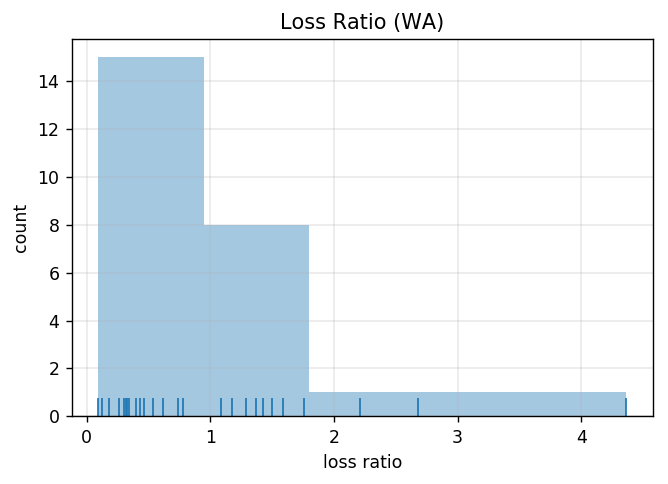

In [12]:
WA_histogram = sns.distplot(WA_avg_LR, kde=False, rug=True, bins=5)
plt.grid(linestyle='-', linewidth=0.25)
plt.title('Loss Ratio (WA)')
plt.xlabel('loss ratio')
plt.ylabel('count')
plt.show()

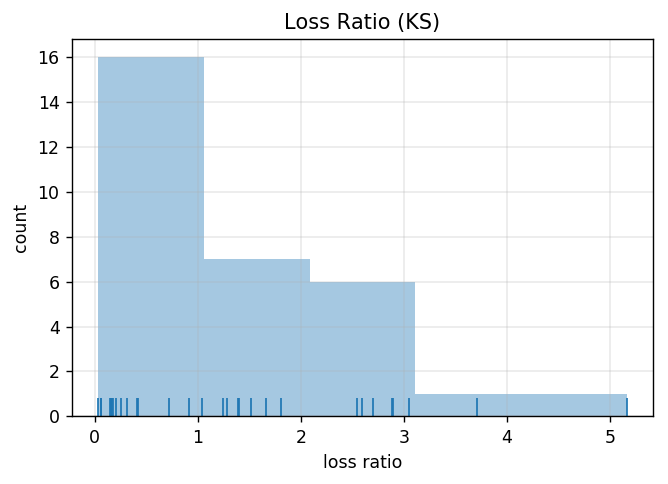

In [13]:
KS_histogram = sns.distplot(KS_avg_LR, kde=False, rug=True, bins=5)
plt.grid(linestyle='-', linewidth=0.25)
plt.title('Loss Ratio (KS)')
plt.xlabel('loss ratio')
plt.ylabel('count')
plt.show()

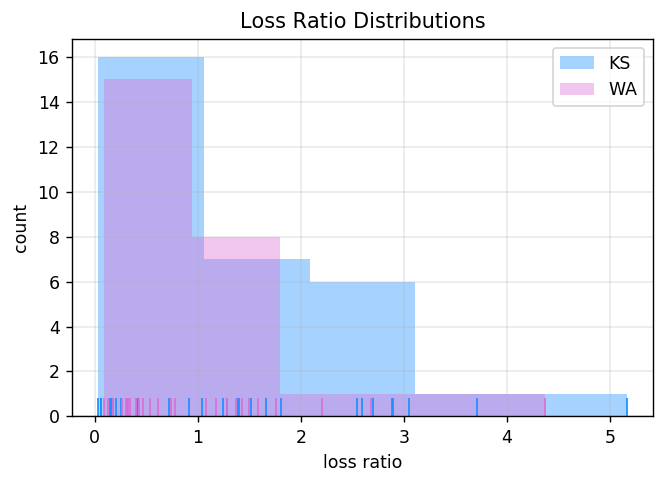

In [14]:
#plt.hist(WA_avg_LR, bins=5, label='WA', color='blue', alpha=0.5)
#plt.hist(KS_avg_LR, bins=5, label='KS', color='lightblue', alpha=0.5)
sns.distplot(KS_avg_LR, kde=False, rug=True, bins=5, color='dodgerblue', label='KS')
sns.distplot(WA_avg_LR, kde=False, rug=True, bins=5, color='orchid', label='WA')

plt.legend(loc='best')
plt.title('Loss Ratio Distributions')
plt.xlabel('loss ratio')
plt.ylabel('count')
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [15]:
df_KS_avg_LR = pd.DataFrame(KS_avg_LR, columns=['loss ratio'])
df_KS_avg_LR['County'] = 'KS'
df_WA_avg_LR = pd.DataFrame(WA_avg_LR, columns=['loss ratio'])
df_WA_avg_LR['County'] = 'WA'
df_KS_WA = pd.concat([df_KS_avg_LR, df_WA_avg_LR])

print(df_KS_WA.shape)
df_KS_WA.head()

(57, 2)


,loss ratio,County
0,2.697223,KS
1,0.410315,KS
2,0.062726,KS
3,0.153116,KS
4,0.912738,KS


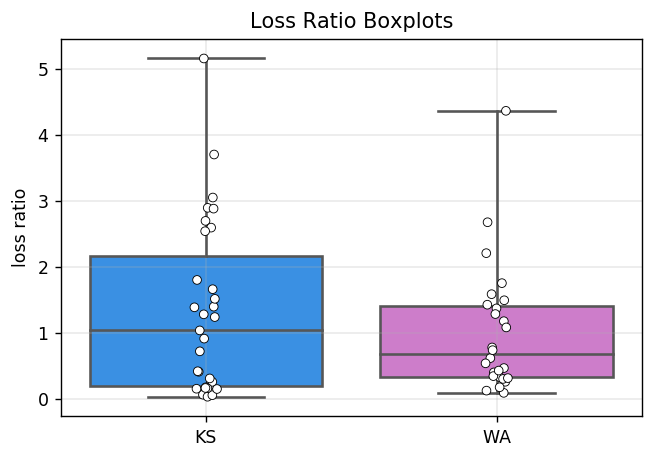

In [16]:
sns.boxplot(x='County', y='loss ratio', data=df_KS_WA, whis=np.inf, palette=['dodgerblue', 'orchid'])
sns.stripplot(x='County', y='loss ratio', data=df_KS_WA, color='white', linewidth=0.5, edgecolor='black', jitter=0.04)

plt.title('Loss Ratio Boxplots')
plt.xlabel('')
plt.ylabel('loss ratio')
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Plots (KS)

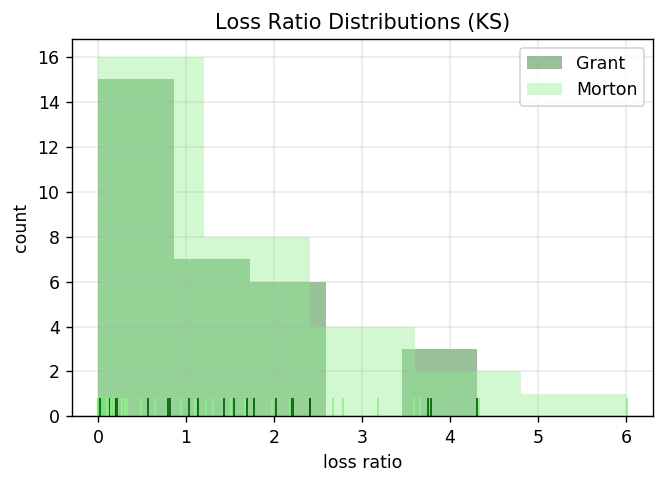

In [17]:
sns.distplot(Grant_LR, kde=False, rug=True, bins=5, color='darkgreen', label='Grant')
sns.distplot(Morton_LR, kde=False, rug=True, bins=5, color='lightgreen', label='Morton')

plt.legend(loc='best')
plt.title('Loss Ratio Distributions (KS)')
plt.xlabel('loss ratio')
plt.ylabel('count')
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [18]:
df_Grant_LR = pd.DataFrame(Grant_LR, columns=['loss ratio'])
df_Grant_LR['County'] = 'Grant'
df_Morton_LR = pd.DataFrame(Morton_LR, columns=['loss ratio'])
df_Morton_LR['County'] = 'Morton'
df_Grant_Morton = pd.concat([df_Grant_LR, df_Morton_LR])

print(df_Grant_Morton.shape)
df_Grant_Morton.head()

(62, 2)


,loss ratio,County
0,2.216181,Grant
1,0.819500,Grant
2,0.026550,Grant
3,0.160988,Grant
4,0.156027,Grant


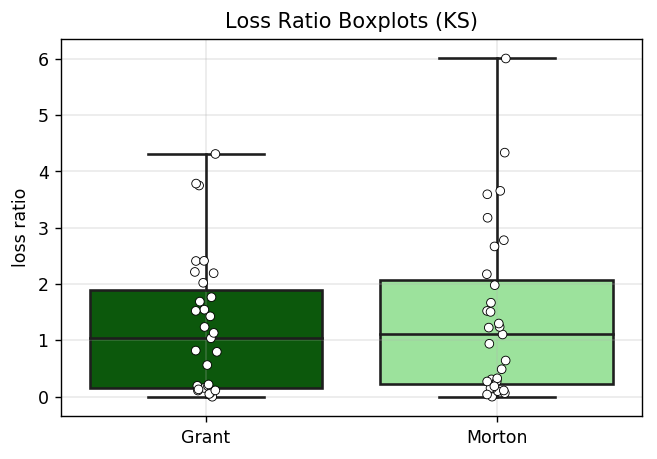

In [19]:
sns.boxplot(x='County', y='loss ratio', data=df_Grant_Morton, whis=np.inf, palette=['darkgreen', 'lightgreen'])
sns.stripplot(x='County', y='loss ratio', data=df_Grant_Morton, color='white', linewidth=0.5, edgecolor='black', jitter=0.04)

plt.title('Loss Ratio Boxplots (KS)')
plt.xlabel('')
plt.ylabel('loss ratio')
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Plots (WA)

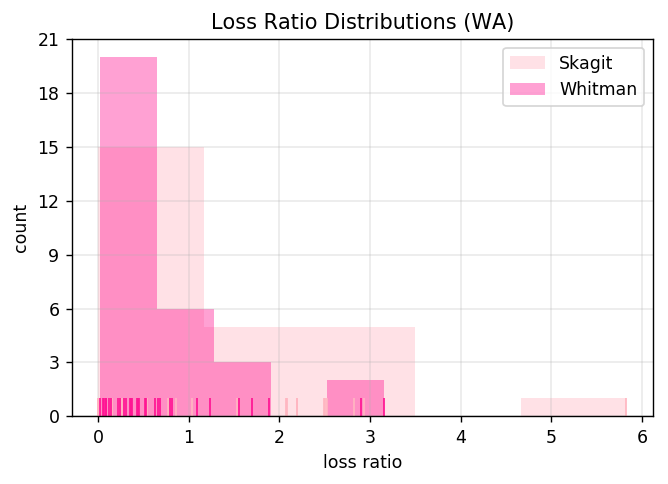

In [20]:
fig, ax = plt.subplots()

sns.distplot(Skagit_LR, kde=False, rug=True, bins=5, color='lightpink', label='Skagit')
sns.distplot(Whitman_LR, kde=False, rug=True, bins=5, color='deeppink', label='Whitman')

plt.legend(loc='best')
plt.title('Loss Ratio Distributions (WA)')
plt.xlabel('loss ratio')
plt.ylabel('count')
#plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
#plt.figure().gca().yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_yticks(range(0,22,3))

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [21]:
df_Skagit_LR = pd.DataFrame(Skagit_LR, columns=['loss ratio'])
df_Skagit_LR['County'] = 'Skagit'
df_Whitman_LR = pd.DataFrame(Whitman_LR, columns=['loss ratio'])
df_Whitman_LR['County'] = 'Whitman'
df_Skagit_Whitman = pd.concat([df_Skagit_LR, df_Whitman_LR])

print(df_Skagit_Whitman.shape)
df_Skagit_Whitman.head()

(57, 2)


,loss ratio,County
0,0.000000,Skagit
1,0.000000,Skagit
2,0.118555,Skagit
3,0.222476,Skagit
4,0.515913,Skagit


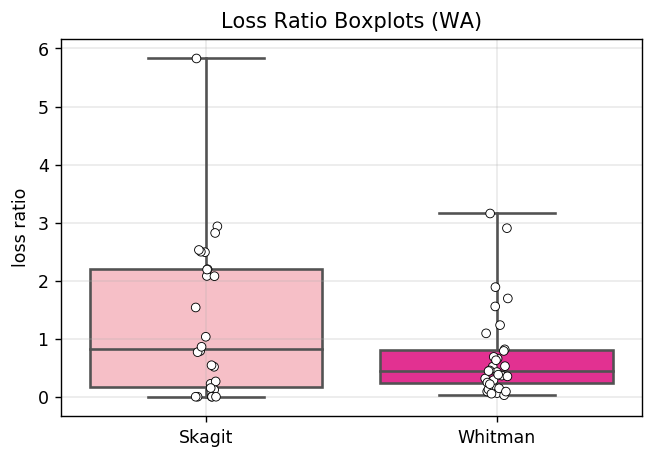

In [22]:
sns.boxplot(x='County', y='loss ratio', data=df_Skagit_Whitman, whis=np.inf, palette=['lightpink', 'deeppink'])
sns.stripplot(x='County', y='loss ratio', data=df_Skagit_Whitman, color='white', linewidth=0.5, edgecolor='black', jitter=0.04)

plt.title('Loss Ratio Boxplots (WA)')
plt.xlabel('')
plt.ylabel('loss ratio')
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

### Statistics

Kansas — Grant, Morton

In [23]:
print('median:', statistics.median(KS_avg_LR))
print('Q1:', np.percentile(KS_avg_LR, 25))
print('Q3:', np.percentile(KS_avg_LR, 75))
print('std:', np.sqrt(stats.describe(KS_avg_LR).variance))
stats.describe(KS_avg_LR)

median: 1.036982
Q1: 0.19105475
Q3: 2.1715554999999997
std: 1.3033775317799947


DescribeResult(nobs=31, minmax=(0.031841, 5.1592155), mean=1.3236296935483869, variance=1.6987929903489112, skewness=1.0682159973011007, kurtosis=0.5851543327736275)

In [24]:
print('median:', statistics.median(Grant_LR))
print('Q1:', np.percentile(Grant_LR, 25))
print('Q3:', np.percentile(Grant_LR, 75))
print('std:', np.sqrt(stats.describe(Grant_LR).variance))
stats.describe(Grant_LR)

median: 1.038
Q1: 0.1585075
Q3: 1.8954849999999999
std: 1.213441630712638


DescribeResult(nobs=31, minmax=(0.0, 4.311336), mean=1.2279437096774193, variance=1.4724405911465464, skewness=0.9685955679216341, kurtosis=0.15955067143004786)

In [25]:
print('median:', statistics.median(Morton_LR))
print('Q1:', np.percentile(Morton_LR, 25))
print('Q3:', np.percentile(Morton_LR, 75))
print('std:', np.sqrt(stats.describe(Morton_LR).variance))
stats.describe(Morton_LR)

median: 1.105589
Q1: 0.2279345
Q3: 2.0785995
std: 1.5018198233035898


DescribeResult(nobs=31, minmax=(0.001131, 6.007095), mean=1.419315677419355, variance=2.2554627816676254, skewness=1.278119828445938, kurtosis=1.1352864284051387)

Washington — Skagit, Whitman

In [26]:
print('median:', statistics.median(WA_avg_LR))
print('Q1:', np.percentile(WA_avg_LR, 25))
print('Q3:', np.percentile(WA_avg_LR, 75))
print('std:', np.sqrt(stats.describe(WA_avg_LR).variance))
stats.describe(WA_avg_LR)

median: 0.677338
Q1: 0.332687125
Q3: 1.412875
std: 0.9654191358343699


DescribeResult(nobs=26, minmax=(0.0903465, 4.3656375), mean=1.0127001923076924, variance=0.9320341078351815, skewness=1.8243901925310915, kurtosis=3.7098542119639486)

In [27]:
print('median:', statistics.median(Skagit_LR))
print('Q1:', np.percentile(Skagit_LR, 25))
print('Q3:', np.percentile(Skagit_LR, 75))
print('std:', np.sqrt(stats.describe(Skagit_LR).variance))
stats.describe(Skagit_LR)

median: 0.8239055
Q1: 0.16794350000000002
Q3: 2.195054
std: 1.3870856423242244


DescribeResult(nobs=26, minmax=(0.0, 5.827459), mean=1.3247786153846153, variance=1.9240065791420062, skewness=1.3289018200092202, kurtosis=2.0976541189741766)

In [28]:
print('median:', statistics.median(Whitman_LR))
print('Q1:', np.percentile(Whitman_LR, 25))
print('Q3:', np.percentile(Whitman_LR, 75))
print('std:', np.sqrt(stats.describe(Whitman_LR).variance))
stats.describe(Whitman_LR)

median: 0.442402
Q1: 0.2301695
Q3: 0.8025305
std: 0.7856042083643003


DescribeResult(nobs=31, minmax=(0.025961, 3.15679), mean=0.7163450322580645, variance=0.617173972199699, skewness=1.813724914829783, kurtosis=2.7092048468932752)

### Data

In [29]:
data_KS_Grant = df_KS_Grant[['Commodity Year', 'Loss Ratio']]
data_KS_Morton = df_KS_Morton[['Commodity Year', 'Loss Ratio']]
data_WA_Skagit = df_WA_Skagit[['Commodity Year', 'Loss Ratio']]
data_WA_Whitman = df_WA_Whitman[['Commodity Year', 'Loss Ratio']]

data_WA_Whitman_truncated = df_WA_Whitman_truncated[['Commodity Year', 'Loss Ratio']] # for average analysis

In [30]:
data_KS = pd.concat([data_KS_Grant, data_KS_Morton]).groupby('Commodity Year', as_index=False).mean()
data_WA = pd.concat([data_WA_Skagit, data_WA_Whitman_truncated]).groupby('Commodity Year', as_index=False).mean()

#print(data_WA.shape)
#data_WA.head()

In [31]:
with pd.ExcelWriter('plots/loss_ratios/ASA_data.xlsx') as writer:  
    data_KS.to_excel(writer, sheet_name='KS')
    data_WA.to_excel(writer, sheet_name='WA')
    data_KS_Grant.to_excel(writer, sheet_name='Grant')
    data_KS_Morton.to_excel(writer, sheet_name='Morton')
    data_WA_Skagit.to_excel(writer, sheet_name='Skagit')
    data_WA_Whitman.to_excel(writer, sheet_name='Whitman')